In [3]:
os.chdir('/Users/Maya/Desktop/radmc3d-2.0/python/radmc3dPy')

In [4]:
%pylab inline
import numpy as np
from matplotlib import cm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=False)
rc('mathtext', fontset = 'stix')

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
BIGGEST_SIZE = 16

rc('font', size=SMALL_SIZE)          # controls default text sizes
rc('axes', titlesize=BIGGEST_SIZE)     # fontsize of the axes title
rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
rc('figure', titlesize=BIGGEST_SIZE) 
pk = {'color':'gray','lw':1, 'ls':'dotted'}

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random', 'power', 'fft', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [5]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import*
import matplotlib.pylab as plb
import pandas as pd
import scipy, astropy, os, radmc3dPy
from radmc3dPy import *

Fast (Fortran90) Mie-scattering module could not be imported. Falling back to the slower Python version.


In [6]:
os.chdir('/Users/Maya/Desktop/radmc3d-2.0/gmaur_models/planet')

In [7]:
par = analyze.readParams()

In [8]:
data = analyze.readData(ddens=True)

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp


In [9]:
data_r = data.grid.x/natconst.au
data_th = data.grid.y
R, TH = np.meshgrid(data_r, data_th)
X = R*np.sin(TH)
Z = R*np.cos(TH)

<ipython-input-10-4d17d1523f9b>:1: RuntimeWarning: divide by zero encountered in log10
  c = plb.contourf(X, Z, np.log10(data.rhodust[:,:,0,0].T), levels=np.arange(-30, -11, 1))


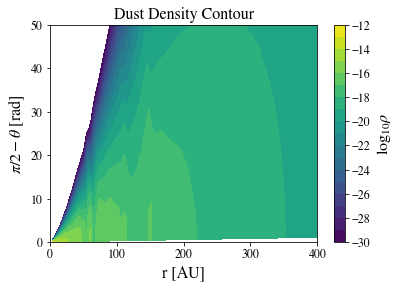

In [10]:
c = plb.contourf(X, Z, np.log10(data.rhodust[:,:,0,0].T), levels=np.arange(-30, -11, 1))
plb.xlabel('r [AU]')
plb.ylabel(r'$\pi/2-\theta$ [rad]')
plt.xlim(0, 400)
plt.ylim(0, 50)
plb.title('Dust Density Contour')
cb = plb.colorbar(c)
cb.set_label(r'$\log_{10}{\rho}$', rotation=90.)

In [11]:
opac = analyze.readOpac(ext=['silicate'])
opac = analyze.readOpac(idust=[0])

Reading dustkappa_silicate.inp
Reading dustkappa_silicate.inp


Text(0, 0.5, '$\\kappa_{\\rm abs}$ [cm$^2$/g]')

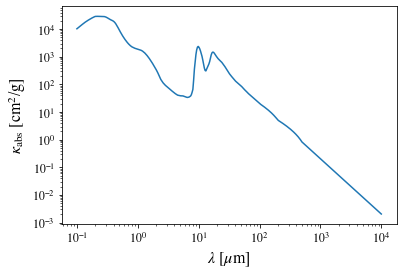

In [12]:
plb.loglog(opac.wav[0], opac.kabs[0])
plb.xlabel(r'$\lambda$ [$\mu$m]')
plb.ylabel(r'$\kappa_{\rm abs}$ [cm$^2$/g]')

In [13]:
data = analyze.readData(dtemp=True)

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_temperature.dat


In [14]:
def planet():
    c1 = plb.contourf(X, Z, data.dusttemp[:,:,0,0].T, 30)
    #c2 = plb.contour(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.dusttemp[:,:,0,0].T, 10,  colors='k', linestyles='solid')

    plb.clabel(c1, inline=1, fontsize=10)

    plb.xlabel('R [AU]', size=12)
    plb.ylabel('Z [AU]', size=12)
    plb.title('2D Temperature Contour - Planet', size=14)
    cb = plb.colorbar(c1)
    cb.set_label('T [K]', rotation=90., size=12)

    #plb.savefig('/Users/Maya/Desktop/temp_infall.png', dpi=500, bbox_inches='tight')

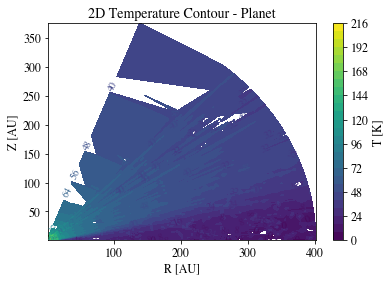

In [15]:
planet()

In [16]:
image.makeImage(npix=300., wav=2100, incl=0., phi=0., sizeau=300.)

Executing RADMC-3D Command:
radmc3d image npix 300 incl 0.0 sizeau 300.0 lambda 2100 phi 0.0 pointau 0.0  0.0  0.0 fluxcons


0

In [17]:
im2 = image.readImage('image.out')

Reading image.out


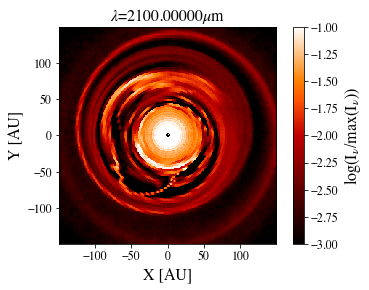

{'implot': <matplotlib.image.AxesImage at 0x1213ccaf0>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x1213ea700>}

In [18]:
image.plotImage(im2, au=True, log=True, maxlog=3, saturate=0.1, cmap=plb.cm.gist_heat)

In [19]:
im = image.readImage('image_p.out')

Reading image_p.out


In [20]:
#image.plotImage(im, au=True, log=True, maxlog=3, saturate=0.1, cmap=plb.cm.gist_heat)

In [21]:
cim = im.imConv(fwhm=[0.1, 0.1], pa=0., dpc=160.)

# under perfect conditions and with simplifying assumptions for vertical dust distribution
# optimal image, preliminary

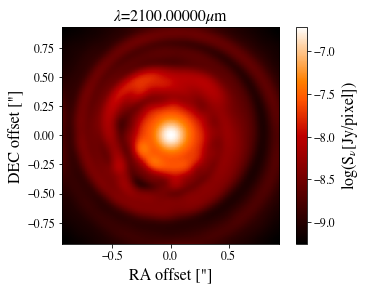

In [22]:
planet = plb.figure()
image.plotImage(cim, arcsec=True, dpc=160., log=True, maxlog=10, bunit='snu', cmap=plb.cm.gist_heat)
planet.savefig('/Users/Maya/Desktop/planet2100.png', dpi=500, bbox_inches='tight')

In [23]:
image.makeImage(npix=300., wav=2.2, incl=0., phi=0., sizeau=300.)

Executing RADMC-3D Command:
radmc3d image npix 300 incl 0.0 sizeau 300.0 lambda 2.2 phi 0.0 pointau 0.0  0.0  0.0 fluxcons


0

In [24]:
im1 = image.readImage('image_p_convolved.out')

Reading image_p_convolved.out


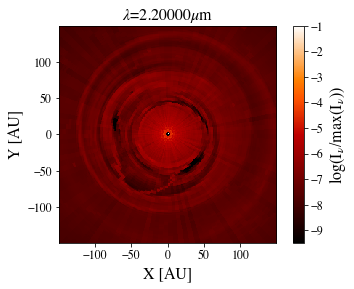

{'implot': <matplotlib.image.AxesImage at 0x1222ac100>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x102bbe160>}

In [25]:
image.plotImage(im1, au=True, log=True, maxlog=9.5, saturate=0.1, cmap=plb.cm.gist_heat)

In [26]:
cim1 = im1.imConv(fwhm=[0.1, 0.1], pa=0., dpc=160.)

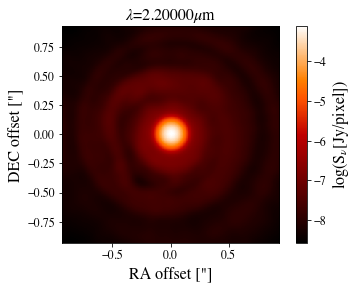

In [27]:
planet = plb.figure()
image.plotImage(cim1, arcsec=True, dpc=160., log=True, maxlog=10, bunit='snu', cmap=plb.cm.gist_heat)
planet.savefig('/Users/Maya/Desktop/planet2.2.png', dpi=500, bbox_inches='tight')

In [28]:
def i_vs_r(im):
    x,y = np.meshgrid(im.x, im.y)
    I = im.image
    R = np.sqrt(x**2 + y**2)
    r_grid = np.linspace(1, 400, 300) 
    i_profile = np.zeros_like(r_grid)
    
    for i in range(len(r_grid)):
        condition = np.abs(r_grid[i] - (R/(1.496 * 10**13))) < (np.diff(r_grid)[0] / 2)
        indices = np.where(condition)
        if(len(indices) > 0): # len(indices) != 0 
            i_profile[i] = np.mean(I[indices])
        else:
            i_profile[i] = 0
    
    return r_grid, i_profile

In [29]:
def plot_intensities(r_arrays, i_arrays, labels, wavelength: str): # corresponding
    for i in range(len(r_arrays)):
        if(labels[i] == 'Planetary'):
            plt.plot(r_arrays[i], i_arrays[i], label=labels[i], color='purple')
        elif(labels[i] == 'Infall'):
            plt.plot(r_arrays[i], i_arrays[i], label=labels[i], color='pink')
        plt.xlabel('Radius [AU]')
        plt.ylabel('Intensity [$erg/s/cm^2/Hz/ster$]')
        plt.yscale('log')
        plt.title("Intensity vs. Radius (" + wavelength + ')', size = 16)
        plt.legend(loc="upper right")

In [30]:
r_grid1, i_profile1 = i_vs_r(cim)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [31]:
r_grid2, i_profile2 = i_vs_r(cim1)

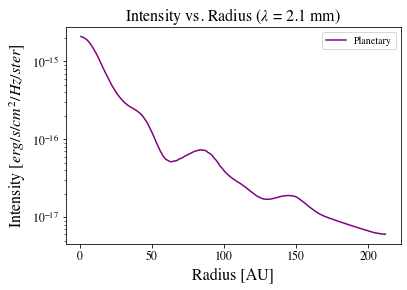

In [32]:
plot_intensities([r_grid1], [i_profile1], ['Planetary'], '$\lambda$ = 2.1 mm')

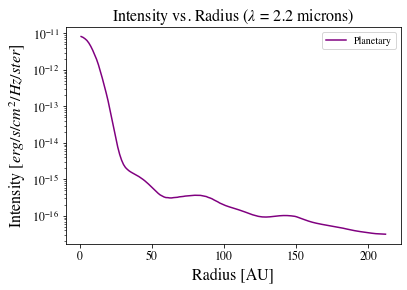

In [33]:
plot_intensities([r_grid2], [i_profile2], ['Planetary'], '$\lambda$ = 2.2 microns')

In [34]:
# increased h so photons would find the disk instead of being scattered on the surface

In [35]:
# intensity is the radial avg

In [36]:
# AAS abstract deadline is mid-October

In [ ]:
# 